In [2]:
from typing_extensions import TypedDict

class State(TypedDict):
    graph_info: str

In [3]:
def start_play(state:State):
    print("Start Play node has been called")
    return {"graph_info": state["graph_info"] + " I am planning to play"}

def cricket(state:State):
    print("Cricket node has been called")
    return {"graph_info": state["graph_info"] + " cricket"}

def batmitton(state:State):
    print("Batminton node has been called")
    return {"graph_info": state["graph_info"] + " batminton"}

In [4]:
import random
from typing import Literal

def  random_play(state:State) -> Literal["cricket", "batmitton"]:
    print("Random Play node has been called")
    if random.random() > 0.5:
        return "cricket"
    else:
        return "batmitton"

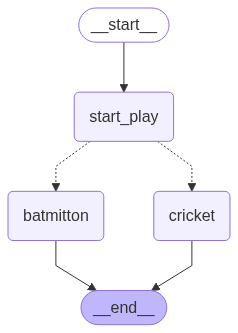

In [7]:
from IPython.display import display, Image
from langgraph.graph import StateGraph, START, END

graph = StateGraph(State)

graph.add_node("start_play", start_play)
graph.add_node("cricket", cricket)
graph.add_node("batmitton", batmitton)

graph.add_edge(START, "start_play")
graph.add_conditional_edges("start_play", random_play)
graph.add_edge("cricket", END)
graph.add_edge("batmitton", END)

graph_builder = graph.compile()

display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [13]:
graph_builder.invoke(
    {
        "graph_info": "I am Sanjai",
    }
)

Start Play node has been called
Random Play node has been called
Batminton node has been called


{'graph_info': 'I am Sanjai I am planning to play batminton'}